In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
from sklearn.ensemble import AdaBoostRegressor


In [ ]:
dataset = pd.read_csv("dataset.csv")

In [70]:
dataset.head()

,neighbourhood,price,size,bedrooms,bathrooms,building
0,PLY,105000.0,1493.0,1.0,NaN,Building_86
1,PLY,53000.0,400.0,0.0,1.0,NaN
2,SNR,175000.0,1415.0,2.0,2.0,Building_283
3,SNR,125000.0,1106.0,1.0,2.0,Building_233
4,ZMS,110000.0,1052.0,1.0,2.0,Building_250


In [71]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67107 entries, 0 to 67106
Data columns (total 6 columns):
neighbourhood    67107 non-null object
price            67107 non-null float64
size             67106 non-null float64
bedrooms         67106 non-null float64
bathrooms        63654 non-null float64
building         61094 non-null object
dtypes: float64(4), object(2)
memory usage: 3.1+ MB


In [72]:
dataset.describe()

,price,size,bedrooms,bathrooms
count,6.710700e+04,6.710600e+04,67106.000000,63654.000000
mean,2.126896e+05,1.605106e+03,1.656886,2.402913
std,5.951512e+06,8.325682e+03,1.007925,1.074872
min,1.200000e+04,-7.550000e+02,0.000000,1.000000
25%,8.900000e+04,8.400000e+02,1.000000,2.000000
50%,1.200000e+05,1.200000e+03,2.000000,2.000000
75%,1.550000e+05,1.640000e+03,2.000000,3.000000
max,5.653430e+08,1.170000e+06,12.000000,12.000000


In [73]:
dataset.shape

(67107, 6)

In [74]:
dataset.columns

Index(['neighbourhood', 'price', 'size', 'bedrooms', 'bathrooms', 'building'], dtype='object')

In [75]:
dataset.index

RangeIndex(start=0, stop=67107, step=1)

In [76]:
dataset.isnull().sum()

neighbourhood       0
price               0
size                1
bedrooms            1
bathrooms        3453
building         6013
dtype: int64

In [77]:
#Imputation 
dataset = dataset.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [78]:
dataset.isnull().sum()

neighbourhood    0
price            0
size             0
bedrooms         0
bathrooms        0
building         0
dtype: int64

In [79]:
#REMOVING BUILDING Column
dataset = dataset.iloc[:,0:-1]

In [80]:
dataset.columns

Index(['neighbourhood', 'price', 'size', 'bedrooms', 'bathrooms'], dtype='object')

In [81]:
dataset.iloc[:,3:5].apply(lambda x: x.unique().tolist(), axis=0)

bedrooms     [1.0, 0.0, 2.0, 3.0, 4.0, 5.0, 10.0, 6.0, 12.0...
bathrooms    [2.0, 1.0, 5.0, 3.0, 4.0, 6.0, 7.0, 12.0, 8.0,...
dtype: object

In [82]:
dataset.iloc[:,3:5].apply(lambda x: x.value_counts(), axis=0)

,bedrooms,bathrooms
0.0,7329.0,NaN
1.0,23955.0,12444.0
2.0,23274.0,29294.0
3.0,9905.0,15834.0
4.0,2348.0,6929.0
5.0,225.0,2145.0
6.0,65.0,372.0
7.0,NaN,72.0
8.0,NaN,12.0
9.0,1.0,NaN


In [83]:
dataset.iloc[:,2].value_counts()

800.00      2097
1400.00     1959
900.00      1934
850.00      1863
1200.00     1789
1300.00     1734
1100.00     1273
1500.00     1183
1000.00     1121
750.00      1010
1800.00      916
1700.00      871
1350.00      865
500.00       858
1600.00      758
950.00       738
1900.00      721
450.00       719
1250.00      684
700.00       660
1450.00      650
2000.00      638
400.00       576
550.00       478
600.00       457
780.00       455
2044.00      365
2400.00      345
650.00       332
2200.00      327
            ... 
2403.00        1
2387.00        1
850.13         1
7847.00        1
2626.00        1
1592.00        1
95.00          1
30000.00       1
12124.00       1
2372.00        1
2903.00        1
2201.00        1
2375.00        1
472.11         1
5813.00        1
2707.00        1
3196.00        1
1143.00        1
3040.00        1
3390.00        1
4037.00        1
620.32         1
1965.00        1
1816.95        1
1105.60        1
11636.00       1
569.00         1
1290.40       

In [84]:
!pip install pandas_profiling

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [85]:
import pandas_profiling 

pandas_profiling.ProfileReport(dataset)

Number of variables,5
Number of observations,67107
Total Missing (%),0.0%
Total size in memory,2.6 MiB
Average record size in memory,40.0 B
Numeric,4
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [86]:
dataset_unique = dataset.drop_duplicates(keep="first")

In [87]:
dataset_unique.head()

,neighbourhood,price,size,bedrooms,bathrooms
0,PLY,105000.0,1493.0,1.0,2.0
1,PLY,53000.0,400.0,0.0,1.0
2,SNR,175000.0,1415.0,2.0,2.0
3,SNR,125000.0,1106.0,1.0,2.0
4,ZMS,110000.0,1052.0,1.0,2.0


In [88]:
pandas_profiling.ProfileReport(dataset_unique)

Number of variables,6
Number of observations,26736
Total Missing (%),0.0%
Total size in memory,1.2 MiB
Average record size in memory,48.0 B
Numeric,5
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [89]:
dataset_unique = dataset_unique[dataset_unique['price']-dataset_unique['size'] > 100]


In [90]:
dataset_unique = dataset_unique[dataset_unique['size'] > 100]


In [91]:
dataset_unique = dataset_unique[dataset_unique['price'] <= 9900000]



In [92]:
dataset_unique = dataset_unique[dataset_unique['bedrooms']-dataset_unique['bathrooms'] > -2]


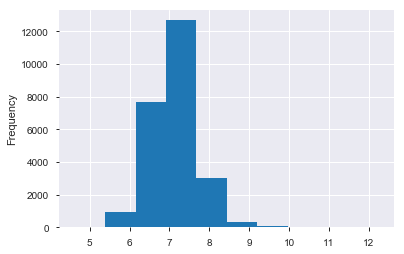

In [93]:
#Frequency distribution of Size
%matplotlib inline
np.log(dataset_unique.iloc[:,2]).plot.hist()

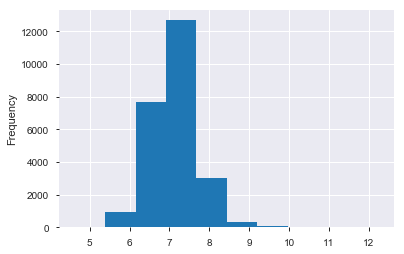

In [94]:
np.log(dataset_unique.iloc[:,2]).plot.hist()

In [95]:
dataset_unique["size_log"] = np.log(dataset_unique.iloc[:,2])
dataset_unique["price"] = np.log(dataset_unique.iloc[:,1])

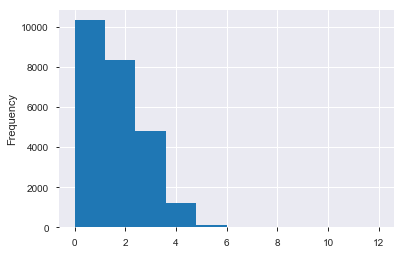

In [96]:
#Frequency distribution of Bedrooms
%matplotlib inline
dataset_unique.iloc[:,3].plot.hist()

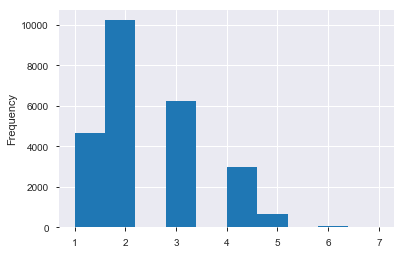

In [97]:
#Frequency distribution of Bathrooms
%matplotlib inline
dataset_unique.iloc[:,4].plot.hist()

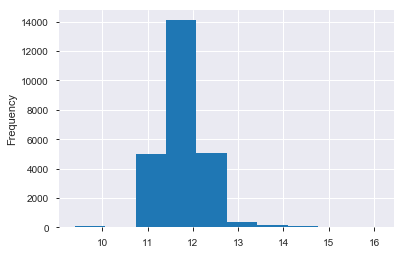

In [98]:
#Frequency distribution of Bathrooms
%matplotlib inline
dataset_unique.iloc[:,1].plot.hist()

In [99]:
dataset_unique["unequalrooms"]= np.where((dataset_unique['bedrooms']-dataset_unique['bathrooms'])>=0, 0, 1)


In [100]:
dataset_unique.head()

,neighbourhood,price,size,bedrooms,bathrooms,size_log,unequalrooms
0,PLY,11.561716,1493.0,1.0,2.0,7.308543,1
1,PLY,10.878047,400.0,0.0,1.0,5.991465,1
2,SNR,12.072541,1415.0,2.0,2.0,7.254885,0
3,SNR,11.736069,1106.0,1.0,2.0,7.008505,1
4,ZMS,11.608236,1052.0,1.0,2.0,6.958448,1


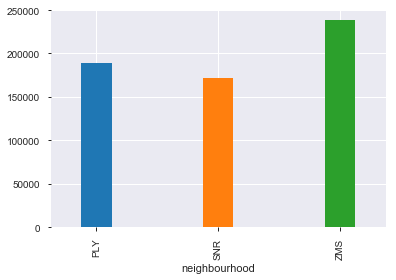

In [101]:
dataset.groupby(['neighbourhood'])['price'].mean().plot(kind= 'Bar', width = 0.25)

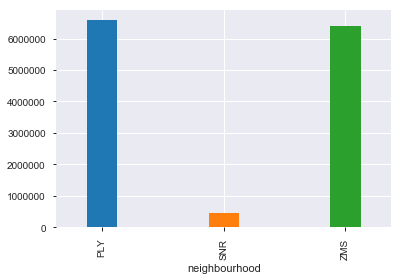

In [102]:
dataset.groupby(['neighbourhood'])['price'].std().plot(kind= 'Bar', width = 0.25)

In [103]:
dataset_unique_ZMS = dataset_unique[dataset_unique['neighbourhood'] == "ZMS"]
dataset_unique_PLY = dataset_unique[dataset_unique['neighbourhood'] == "PLY"]
dataset_unique_SNR = dataset_unique[dataset_unique['neighbourhood'] == "SNR"]

In [104]:
dataset_unique.groupby(["bedrooms","neighbourhood"]).mean()

price          size  bathrooms  size_log  \
bedrooms neighbourhood                                                 
0.0      PLY            11.116323    544.628372   1.000000  6.208101   
         SNR            11.376044   1219.467589   1.000000  6.586614   
         ZMS            11.179416    580.248459   1.000000  6.224624   
1.0      PLY            11.412339    977.508774   1.701826  6.781231   
         SNR            11.672857   1154.550256   1.803419  7.003056   
         ZMS            11.531076   1013.406845   1.682787  6.780201   
2.0      PLY            11.735845   1532.922734   2.511369  7.243256   
         SNR            11.926214   1626.980653   2.585003  7.293269   
         ZMS            11.894172   1585.921316   2.527658  7.272287   
3.0      PLY            11.978356   1988.611686   3.343791  7.538209   
         SNR            12.161400   2099.123941   3.380410  7.609126   
         ZMS            12.239347   2581.249617   3.404015  7.727571   
4.0      PLY            12.210442   4267.318182   4.250000  8.074834   
         SNR            12.484752   3347.276703   4.218341  8.057565   
         ZMS            12.544206   3790.357504   4.281907  8.144959   
5.0      PLY            12.664831   5796.880000   5.480000  8.648841   
         SNR            12.760194   5094.363636   5.000000  8.499333   
         ZMS            12.890597   5285.251852   5.234568  8.511482   
6.0      PLY            12.765688   7000.000000   5.000000  8.853665   
         SNR            12.765688   5500.000000   7.000000  8.612503   
         ZMS            13.789864  23802.500000   6.500000  9.766598   
9.0      ZMS            12.388394   1700.000000   2.000000  7.438384   
10.0     PLY            11.462053    405.000000   6.000000  6.003887   
         ZMS            11.302204    867.000000   2.000000  6.765039   
12.0     SNR            11.732859   1315.000000   2.000000  7.177753   

                        unequalrooms  
bedrooms neighbourhood                
0.0      PLY                1.000000  
         SNR                1.000000  
         ZMS                1.000000  
1.0      PLY                0.701826  
         SNR                0.803419  
         ZMS                0.682787  
2.0      PLY                0.521475  
         SNR                0.592444  
         ZMS                0.540190  
3.0      PLY                0.498039  
         SNR                0.525437  
         ZMS                0.531752  
4.0      PLY                0.477273  
         SNR                0.495633  
         ZMS                0.523142  
5.0      PLY                0.720000  
         SNR                0.272727  
         ZMS                0.592593  
6.0      PLY                0.000000  
         SNR                1.000000  
         ZMS                0.500000  
9.0      ZMS                0.000000  
10.0     PLY                0.000000  
         ZMS                0.000000  
12.0     SNR                0.000000

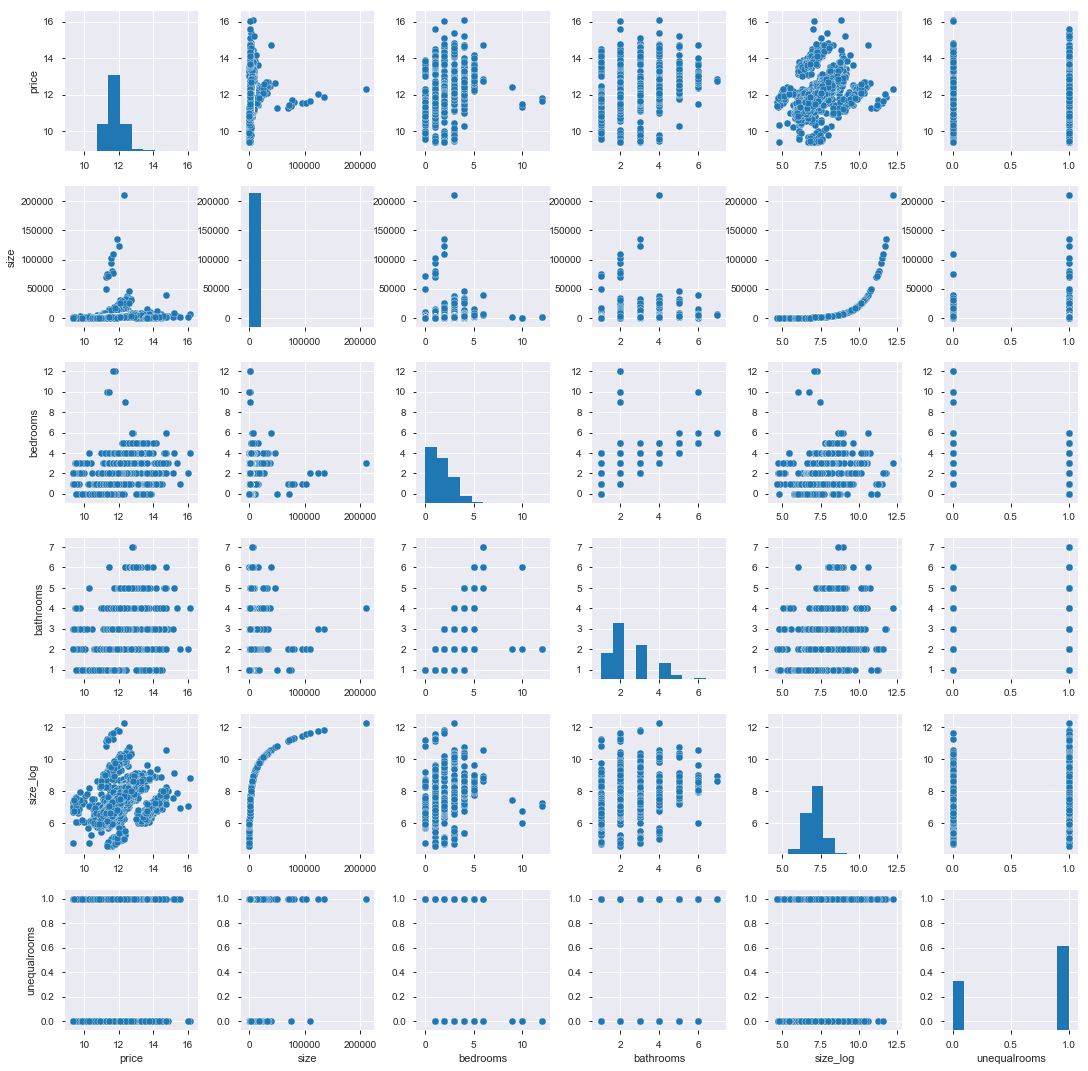

In [105]:
sns.pairplot(dataset_unique)

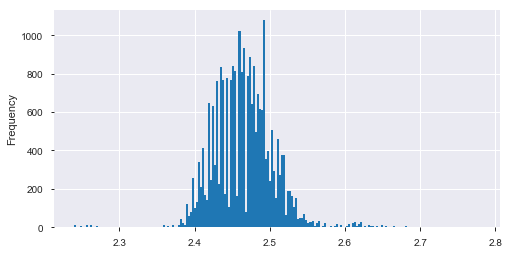

In [106]:
np.log(dataset_unique['price']).plot.hist(bins=200,figsize=(8,4))


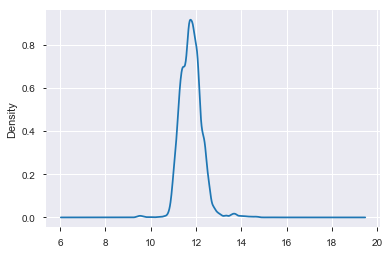

In [107]:
dataset_unique['price'].plot.density()


mean :  11.78253452137706
var  :  0.23829022562491742
skew :  0.8322703186127668
kurt :  4.987095860642463


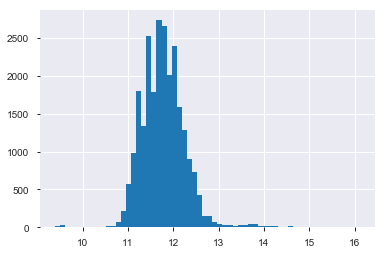

In [108]:
plt.hist(dataset_unique['price'], bins=60)

print("mean : ", np.mean(dataset_unique['price']))
print("var  : ", np.var(dataset_unique['price']))
print("skew : ",skew(dataset_unique['price']))
print("kurt : ",kurtosis(dataset_unique['price']))

In [109]:
dataset_unique.columns

Index(['neighbourhood', 'price', 'size', 'bedrooms', 'bathrooms', 'size_log',
       'unequalrooms'],
      dtype='object')

MODELLING

# Simple Linear Regression

/Users/mnoordeen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/mnoordeen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


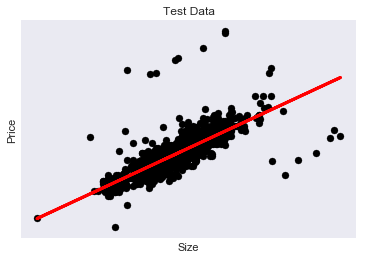

In [115]:
lm = LinearRegression()

X = dataset_unique.drop(['price', 'neighbourhood'],1)
y = dataset_unique.iloc[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.95, random_state = 100)
Y = y_train
X = X_train['size_log']
 
X=X.reshape(len(X),1)
Y=Y.reshape(len(Y),1)
 
# Plot outputs
plt.scatter(X, Y,  color='black')
plt.title('Test Data')
plt.xlabel('Size')
plt.ylabel('Price')
plt.xticks(())
plt.yticks(())
# Create linear regression object
regr = LinearRegression()
 
# Train the model using the training sets
regr.fit(X, Y)
# Plot outputs
plt.plot(X, regr.predict(X), color='red',linewidth=3)
plt.show()

# Multiple Linear Regression

In [188]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def linearModel(neigh, name, hack):
    if(hack ==1):
        X = neigh.drop(['price', 'neighbourhood'],1)
    else:
        X = neigh.drop(['price'],1)
    y = neigh.iloc[:, 1]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
    print("Modelling for Neighbourhood :",name)
    print("-----------------------------------")
    #print("Training feature set size of", name, X_train.shape)
    #print("Training variable set size of", name, y_train.shape)
    #print("Test feature set size of", name, X_test.shape)
    #print("Test variable set size of", name, y_test.shape)

    lm = LinearRegression()
    lm.fit(X_train, y_train)
    #print("Intercept of ", name, lm.intercept_)
    #print("Coeff of ", name, lm.coef_)
    train_pred = lm.predict(X_train)
    print("--Train Error Metrics--")
    #print("Mean Absolute Error of train dataset - ", name, ": ", metrics.mean_absolute_error(np.exp(y_train), np.exp(train_pred)))
    print("Mean Absolute Error of train dataset - ", name, ": ", metrics.mean_absolute_error(y_train, train_pred))
    print("Mean Squared Error of train dataset - ", name, ": ", metrics.mean_squared_error(y_train, train_pred))
    print("R square of train dataset - ", name, ": ", metrics.r2_score(y_train, train_pred))
    print("Mean Absolute Percentage Error of train dataset - ", name, ": ",mean_absolute_percentage_error(y_train, train_pred)) 
          
    test_pred = lm.predict(X_test)
    print("--Test Error Metrics--")
    #print("Mean Absolute Error of test dataset - ", name, ": ", metrics.mean_absolute_error(np.exp(y_test), np.exp(test_pred)))
    print("Mean Absolute Error of test dataset - ", name, ": ", metrics.mean_absolute_error(y_test, test_pred))
    print("Mean Squared Error of test dataset - ", name, ": ", metrics.mean_squared_error(y_test, test_pred))
    print("R square of test dataset - ", name, ": ", metrics.r2_score(y_test, test_pred))
    print("Mean Absolute Percentage Error of test dataset - ", name, ": ",mean_absolute_percentage_error(y_test, test_pred), "\n")
linearModel(dataset_unique_ZMS, 'ZMS',1)
linearModel(dataset_unique_PLY, 'PLY',1)
linearModel(dataset_unique_SNR, 'SNR',1)


Modelling for Neighbourhood : ZMS
-----------------------------------
--Train Error Metrics--
Mean Absolute Error of train dataset -  ZMS :  0.19148567141007855
Mean Squared Error of train dataset -  ZMS :  0.10427505477185015
R square of train dataset -  ZMS :  0.5664131460206537
Mean Absolute Percentage Error of train dataset -  ZMS :  1.6115783318545813
--Test Error Metrics--
Mean Absolute Error of test dataset -  ZMS :  0.19722468656941475
Mean Squared Error of test dataset -  ZMS :  0.11322772375775932
R square of test dataset -  ZMS :  0.5379782816624092
Mean Absolute Percentage Error of test dataset -  ZMS :  1.6481408210974091 

Modelling for Neighbourhood : PLY
-----------------------------------
--Train Error Metrics--
Mean Absolute Error of train dataset -  PLY :  0.15142271122443465
Mean Squared Error of train dataset -  PLY :  0.11203755853645249
R square of train dataset -  PLY :  0.42668887857802085
Mean Absolute Percentage Error of train dataset -  PLY :  1.283066835086

In [119]:
#Variation inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import Imputer

from statsmodels.stats.outliers_influence import variance_inflation_factor
class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=5.0, impute=True, impute_strategy='median'):
        # From looking at documentation, values between 5 and 10 are "okay".
        # Above 10 is too high and so should be removed.
        self.thresh = thresh
        
        # The statsmodel function will fail with NaN values, as such we have to impute them.
        # By default we impute using the median value.
        # This imputation could be taken out and added as part of an sklearn Pipeline.
        if impute:
            self.imputer = Imputer(strategy=impute_strategy)

    def fit(self, X, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        print('ReduceVIF transform')
        columns = X.columns.tolist()
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X), columns=columns)
        return ReduceVIF.calculate_vif(X, self.thresh)

    @staticmethod
    def calculate_vif(X, thresh=5.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print('Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X

In [120]:
transformer = ReduceVIF()

X = dataset_unique.drop(['price', 'neighbourhood'],1)
y = dataset_unique.iloc[:, 1]
# Only use 10 columns for speed in this example
X = transformer.fit_transform(X, y)

X.head()

ReduceVIF fit
ReduceVIF transform
Dropping {X.columns[maxloc]} with vif={max_vif}
Dropping {X.columns[maxloc]} with vif={max_vif}


,size,bedrooms,unequalrooms
0,1493.0,1.0,1.0
1,400.0,0.0,1.0
2,1415.0,2.0,0.0
3,1106.0,1.0,1.0
4,1052.0,1.0,1.0


In [182]:
linearModel(dataset_unique_ZMS.drop(['bathrooms', 'size_log'],1), 'ZMS',1)
linearModel(dataset_unique_PLY.drop(['bathrooms', 'size_log'],1), 'PLY',1)
linearModel(dataset_unique_SNR.drop(['bathrooms', 'size_log'],1), 'SNR',1)

Modelling for Neighbourhood : ZMS
-----------------------------------
--Train Error Metrics--
Mean Absolute Error of train dataset -  ZMS :  0.2057698233708207
Mean Squared Error of train dataset -  ZMS :  0.11262446886676443
R square of train dataset -  ZMS :  0.531695387320785
Mean Absolute Percentage Error of train dataset -  ZMS :  1.7312628289993797
--Test Error Metrics--
Mean Absolute Error of test dataset -  ZMS :  0.20994821010004755
Mean Squared Error of test dataset -  ZMS :  0.1180099740087118
R square of test dataset -  ZMS :  0.5184644788132724
Mean Absolute Percentage Error of test dataset -  ZMS :  1.755209938125201 

Modelling for Neighbourhood : PLY
-----------------------------------
--Train Error Metrics--
Mean Absolute Error of train dataset -  PLY :  0.1687541923003119
Mean Squared Error of train dataset -  PLY :  0.12004370265157466
R square of train dataset -  PLY :  0.385720371937337
Mean Absolute Percentage Error of train dataset -  PLY :  1.4327793814019374
--

In [126]:
dataset_unique['bins_size'] = pd.qcut(dataset_unique['size'], 5, labels=["very small","small","medium","large","very large"])


In [128]:
dataset_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24847 entries, 0 to 67082
Data columns (total 8 columns):
neighbourhood    24847 non-null object
price            24847 non-null float64
size             24847 non-null float64
bedrooms         24847 non-null float64
bathrooms        24847 non-null float64
size_log         24847 non-null float64
unequalrooms     24847 non-null int64
bins_size        24847 non-null category
dtypes: category(1), float64(5), int64(1), object(1)
memory usage: 2.2+ MB


In [177]:
dataset_unique_size_bucket = pd.get_dummies(dataset_unique, columns=["bins_size","neighbourhood"])


In [178]:
dataset_unique_size_bucket.columns

Index(['price', 'size', 'bedrooms', 'bathrooms', 'size_log', 'unequalrooms',
       'bins_size_very small', 'bins_size_small', 'bins_size_medium',
       'bins_size_large', 'bins_size_very large', 'neighbourhood_PLY',
       'neighbourhood_SNR', 'neighbourhood_ZMS'],
      dtype='object')

In [179]:
dataset_unique_size_bucket.head()

,price,size,bedrooms,bathrooms,size_log,unequalrooms,bins_size_very small,bins_size_small,bins_size_medium,bins_size_large,bins_size_very large,neighbourhood_PLY,neighbourhood_SNR,neighbourhood_ZMS
0,11.561716,1493.0,1.0,2.0,7.308543,1,0,0,0,1,0,1,0,0
1,10.878047,400.0,0.0,1.0,5.991465,1,1,0,0,0,0,1,0,0
2,12.072541,1415.0,2.0,2.0,7.254885,0,0,0,1,0,0,0,1,0
3,11.736069,1106.0,1.0,2.0,7.008505,1,0,0,1,0,0,0,1,0
4,11.608236,1052.0,1.0,2.0,6.958448,1,0,1,0,0,0,0,0,1


In [189]:
dataset_unique_size_bucket = dataset_unique_size_bucket.fillna(lambda x: x.median())

linearModel(dataset_unique_size_bucket, 'Whole Data',2)


Modelling for Neighbourhood : Whole Data
-----------------------------------
--Train Error Metrics--
Mean Absolute Error of train dataset -  Whole Data :  5.863726145750503e-13
Mean Squared Error of train dataset -  Whole Data :  3.727273450596128e-24
R square of train dataset -  Whole Data :  1.0
Mean Absolute Percentage Error of train dataset -  Whole Data :  5.540797629135522e-14
--Test Error Metrics--
Mean Absolute Error of test dataset -  Whole Data :  6.290900433415111e-13
Mean Squared Error of test dataset -  Whole Data :  3.576859095500273e-24
R square of test dataset -  Whole Data :  1.0
Mean Absolute Percentage Error of test dataset -  Whole Data :  5.613981791800892e-14 



In [142]:
transformer = ReduceVIF()

X = dataset_unique_size_bucket.drop(['price', 'neighbourhood'],1)
y = dataset_unique_size_bucket.iloc[:, 1]
# Only use 10 columns for speed in this example
X = transformer.fit_transform(X, y)

X.head()

ReduceVIF fit
ReduceVIF transform
Dropping {X.columns[maxloc]} with vif={max_vif}
Dropping {X.columns[maxloc]} with vif={max_vif}
Dropping {X.columns[maxloc]} with vif={max_vif}
Dropping {X.columns[maxloc]} with vif={max_vif}


/Users/mnoordeen/anaconda/lib/python3.5/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/mnoordeen/anaconda/lib/python3.5/site-packages/statsmodels/regression/linear_model.py:1386: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,unequalrooms,bins_size_very small,bins_size_small,bins_size_medium,bins_size_large,bins_size_very large
0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0


#  Decision Tree Regression

/Users/mnoordeen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/mnoordeen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


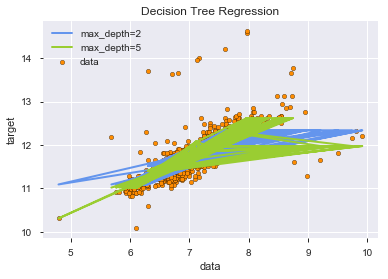

Modelling using Decision Tree
-----------------------------------
--Train Error Metrics with Max_Depth of tree 2--
Mean Absolute Error of Train Data set: 0.19272499820907515
Mean Squared Error of Train Data set: 0.08405512983511067
R square of Train Data set: 0.5950989087453784
Mape of Train Data set: 3.8056849897491576
---------------------------
--Train Error Metrics with Max_Depth of tree 5--
Mean Absolute Error of Train Data set: 0.16955225059993745
Mean Squared Error of Train Data set: 0.069892808482026
R square of Train Data set: 0.6633200795628116
Mape of Train Data set: 3.866749196367103
Test Prediction
-----------------------------------
--Test Error Metrics with Max_Depth of tree 2--
Mean Absolute Error of Test Data set:  0.2153418935412982
Mean Squared Error of Test Data set:  0.12585236019551482
R square of Test Data set:  0.4754072423550526


/Users/mnoordeen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:58: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/mnoordeen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:59: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


Mape of Test Data set:  3.921081374672804
---------------------------
--Test Error Metrics with Max_Depth of tree 5--
Mean Absolute Error of Test Data set:  0.19788646917367267
Mean Squared Error of Test Data set:  0.11955921126977949
R square of Test Data set:  0.5016390932642697
Mape of Test Data set:   3.9929968999532615


In [173]:

X = dataset_unique_size_bucket.drop(['price', 'neighbourhood'],1)
y = dataset_unique_size_bucket.iloc[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.95, random_state = 100)


Y = y_train
X = X_train['size_log']

X=X.reshape(len(X),1)
Y=Y.reshape(len(Y),1)
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=4)
regr_1.fit(X, Y)
regr_2.fit(X, Y)

# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# Plot the results
plt.figure()
plt.scatter(X, Y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

print("Modelling using Decision Tree")
print("-----------------------------------")
print("--Train Error Metrics with Max_Depth of tree 2--")
print("Mean Absolute Error of Train Data set:", metrics.mean_absolute_error(Y, y_1))
print("Mean Squared Error of Train Data set:", metrics.mean_squared_error(Y, y_1))
print("R square of Train Data set:", metrics.r2_score(Y, y_1))
print("Mape of Train Data set:", mean_absolute_percentage_error(Y, y_1))

print("---------------------------")
print("--Train Error Metrics with Max_Depth of tree 5--")
print("Mean Absolute Error of Train Data set:", metrics.mean_absolute_error(Y, y_2))
print("Mean Squared Error of Train Data set:", metrics.mean_squared_error(Y, y_2))
print("R square of Train Data set:", metrics.r2_score(Y, y_2))
print("Mape of Train Data set:", mean_absolute_percentage_error(Y, y_2))



# Predict
print("Test Prediction")
Y = y_test
X = X_test['size_log']

X=X.reshape(len(X),1)
Y=Y.reshape(len(Y),1)
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

print("-----------------------------------")
print("--Test Error Metrics with Max_Depth of tree 2--")
print("Mean Absolute Error of Test Data set: ", metrics.mean_absolute_error(Y, y_1))
print("Mean Squared Error of Test Data set: ", metrics.mean_squared_error(Y, y_1))
print("R square of Test Data set: ", metrics.r2_score(Y, y_1))
print("Mape of Test Data set: ", mean_absolute_percentage_error(Y, y_1))
print("---------------------------")
print("--Test Error Metrics with Max_Depth of tree 5--")
print("Mean Absolute Error of Test Data set: ", metrics.mean_absolute_error(Y, y_2))
print("Mean Squared Error of Test Data set: ", metrics.mean_squared_error(Y, y_2))
print("R square of Test Data set: ", metrics.r2_score(Y, y_2))
print("Mape of Test Data set:  ", mean_absolute_percentage_error(Y, y_2))

In [190]:

X = dataset_unique_size_bucket.drop(['price'],1)
y = dataset_unique_size_bucket.iloc[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.95, random_state = 100)

Y = y_train
#X = X_train

#X=X.reshape(len(X),1)
#Y=Y.reshape(len(Y),1)
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=4)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

# Predict
y_1 = regr_1.predict(X_train)
y_2 = regr_2.predict(X_train)



print("Modelling using Decision Tree")
print("-----------------------------------")
print("--Train Error Metrics with Max_Depth of tree 2--")
print("Mean Absolute Error of Train Data set:", metrics.mean_absolute_error(Y, y_1))
print("Mean Squared Error of Train Data set:", metrics.mean_squared_error(Y, y_1))
print("R square of Train Data set:", metrics.r2_score(Y, y_1))
print("Mape of Train Data set:", mean_absolute_percentage_error(Y, y_1))

print("---------------------------")
print("--Train Error Metrics with Max_Depth of tree 5--")
print("Mean Absolute Error of Train Data set:", metrics.mean_absolute_error(Y, y_2))
print("Mean Squared Error of Train Data set:", metrics.mean_squared_error(Y, y_2))
print("R square of Train Data set:", metrics.r2_score(Y, y_2))
print("Mape of Train Data set:", mean_absolute_percentage_error(Y, y_2))



# Predict
print("Test Prediction")
Y = y_test
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

print("-----------------------------------")
print("--Test Error Metrics with Max_Depth of tree 2--")
print("Mean Absolute Error of Test Data set: ", metrics.mean_absolute_error(Y, y_1))
print("Mean Squared Error of Test Data set: ", metrics.mean_squared_error(Y, y_1))
print("R square of Test Data set: ", metrics.r2_score(Y, y_1))
print("Mape of Test Data set: ", mean_absolute_percentage_error(Y, y_1))
print("---------------------------")
print("--Test Error Metrics with Max_Depth of tree 5--")
print("Mean Absolute Error of Test Data set: ", metrics.mean_absolute_error(Y, y_2))
print("Mean Squared Error of Test Data set: ", metrics.mean_squared_error(Y, y_2))
print("R square of Test Data set: ", metrics.r2_score(Y, y_2))
print("Mape of Test Data set:  ", mean_absolute_percentage_error(Y, y_2))

Modelling using Decision Tree
-----------------------------------
--Train Error Metrics with Max_Depth of tree 2--
Mean Absolute Error of Train Data set: 432.120553850602
Mean Squared Error of Train Data set: 339594.44055892417
R square of Train Data set: 0.7915643735282145
Mape of Train Data set: 38.87719626963514
---------------------------
--Train Error Metrics with Max_Depth of tree 5--
Mean Absolute Error of Train Data set: 125.691930879147
Mean Squared Error of Train Data set: 27113.312408939724
R square of Train Data set: 0.9833584429462944
Mape of Train Data set: 10.85531574186352
Test Prediction
-----------------------------------
--Test Error Metrics with Max_Depth of tree 2--
Mean Absolute Error of Test Data set:  483.7259478450164
Mean Squared Error of Test Data set:  4735970.266945366
R square of Test Data set:  0.4155936041861257
Mape of Test Data set:  38.72629345613213
---------------------------
--Test Error Metrics with Max_Depth of tree 5--
Mean Absolute Error of Tes

# Random Forest Regression

In [192]:
X = dataset_unique_size_bucket.drop(['price'],1)
y = dataset_unique_size_bucket.iloc[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.95, random_state = 100)
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index.values, columns=X_train.columns.values)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index.values, columns=X_test.columns.values)

In [213]:
rf = RandomForestRegressor(n_estimators=1000, oob_score=True, random_state=0,verbose=1)
rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.5s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=True, random_state=0, verbose=1, warm_start=False)

In [216]:
names = X_train.columns
predicted_train = rf.predict(X_train)
predicted_test = rf.predict(X_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)
print('Out-of-bag R-2 score estimate: ',rf.oob_score_)
print('Test data R-2 score: ',test_score)
print('Test data Spearman correlation: ',spearman[0])
print('Test data Pearson correlation: ',pearson[0])
print ("Important Feature: ",sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))


print("-----------------------------------")
print("--Test Error Metrics --")
print("Mean Absolute Error of Test Data set: ", metrics.mean_absolute_error(y_test, predicted_test))
print("Mean Squared Error of Test Data set: ", metrics.mean_squared_error(y_test, predicted_test))
print("R square of Test Data set: ", metrics.r2_score(y_test, predicted_test))
print("Mape of Test Data set: ", mean_absolute_percentage_error(y_test, predicted_test))

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished


Out-of-bag R-2 score estimate:  0.9912040829720221
Test data R-2 score:  0.4461691650702321
Test data Spearman correlation:  0.9999891364173367
Test data Pearson correlation:  0.7042268644548005
Important Feature:  [(0.5054, 'size'), (0.4836, 'size_log'), (0.0045, 'bathrooms'), (0.0031, 'bedrooms'), (0.0013, 'neighbourhood_ZMS'), (0.0012, 'neighbourhood_SNR'), (0.0006, 'unequalrooms'), (0.0002, 'bins_size_large'), (0.0001, 'bins_size_medium'), (0.0, 'neighbourhood_PLY'), (0.0, 'bins_size_very small'), (0.0, 'bins_size_very large'), (0.0, 'bins_size_small')]
-----------------------------------
--Test Error Metrics --
Mean Absolute Error of Test Data set:  59.713366665960535
Mean Squared Error of Test Data set:  4488189.01698036
R square of Test Data set:  0.4461691650702321
Mape of Test Data set:  0.3066284202318045


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.1s finished


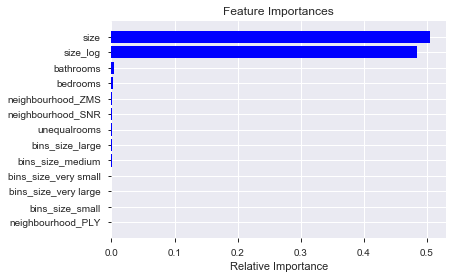

In [215]:
features = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

# AdaBoost

/Users/mnoordeen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/mnoordeen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/mnoordeen/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mnoordeen/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


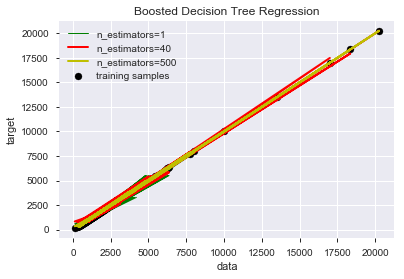

Mean Absolute Error Train 123.99670039645794
Mean Squared Error Train 28053.734894801302
R square Train 0.9827812322308713
Mape Train 74.4636101524463


/Users/mnoordeen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/mnoordeen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:53: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


Mean Absolute Error Test 179.29387919766606
Mean Squared Error Test 4230937.809821732
R square Test 0.4779132940069427
Mape Test 77.00176125299154


In [235]:
X = dataset_unique_size_bucket.drop(['price'],1)
y = dataset_unique_size_bucket.iloc[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.95, random_state = 100)


Y = y_train
X = X_train['size']

X=X.reshape(len(X),1)
Y=Y.reshape(len(Y),1)

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3),
                          n_estimators=40, random_state=32)

regr_3 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=500, random_state=32)
regr_1.fit(X, Y)
regr_2.fit(X, Y)
regr_3.fit(X, Y)

# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)
y_3 = regr_3.predict(X)


# Plot the results
plt.figure()
plt.scatter(X, Y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="n_estimators=1", linewidth=1)
plt.plot(X, y_2, c="r", label="n_estimators=40", linewidth=2)
plt.plot(X, y_3, c="y", label="n_estimators=500", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

print("Mean Absolute Error Train", metrics.mean_absolute_error(Y, y_2))
print("Mean Squared Error Train", metrics.mean_squared_error(Y, y_2))
print("R square Train", metrics.r2_score(Y, y_2))
print("Mape Train", mean_absolute_percentage_error(Y, y_2))

X = X_test['size']
Y = y_test

X=X.reshape(len(X),1)
Y=Y.reshape(len(Y),1)

# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)
y_3 = regr_3.predict(X)

print("Mean Absolute Error Test", metrics.mean_absolute_error(Y, y_2))
print("Mean Squared Error Test", metrics.mean_squared_error(Y, y_2))
print("R square Test", metrics.r2_score(Y, y_2))
print("Mape Test", mean_absolute_percentage_error(Y, y_2))


